In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft as sp
import statistics as st
from sklearn import preprocessing

# Perbandingan antar Daerah

In [21]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,9,...,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,75.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,...,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00%,0.00%,NaN,NaN


In [22]:
Idn=pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Idn = Idn[Idn['Location'] == 'Indonesia']
Idn = Idn[Idn['New Recovered'] >0]

Jakarta = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Jakarta = Jakarta[Jakarta['Location'] == 'DKI Jakarta']

Jabar = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Jabar = Jabar[Jabar['Location'] == 'Jawa Barat']

Jatim = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Jatim = Jatim[Jatim['Location'] == 'Jawa Timur']

Jateng = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Jateng = Jateng[Jateng['Location'] == 'Jawa Tengah']

Banten = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
Banten = Banten[Banten['Location'] == 'Banten']

DIY = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
DIY = DIY[DIY['Location'] == 'Daerah Istimewa Yogyakarta']

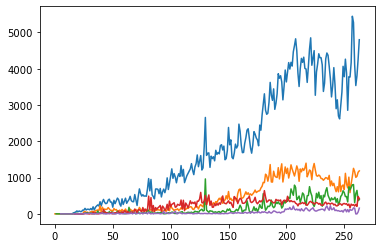

In [23]:
NCIdn=Idn['New Cases'].values
NCJakarta=Jakarta['New Cases'].values
NCJabar=Jabar['New Cases'].values
NCJatim=Jatim['New Cases'].values
NCBanten=Banten['New Cases'].values

tIdn=range(len(NCIdn))+np.full((len(NCIdn)), len(NCJakarta)-len(NCIdn))
tJabar=range(len(Jabar))+np.full((len(Jabar)), len(NCJakarta)-len(Jabar))
tJatim=range(len(Jatim))+np.full((len(Jatim)), len(NCJakarta)-len(Jatim))
tBanten=range(len(Banten))+np.full((len(Banten)), len(NCJakarta)-len(Banten))


plt.plot(tIdn,NCIdn,'-')
plt.plot(NCJakarta,'-')
plt.plot(tJabar,NCJabar,'-')
plt.plot(tJatim,NCJatim,'-')
plt.plot(tBanten,NCBanten,'-')

plt.show()

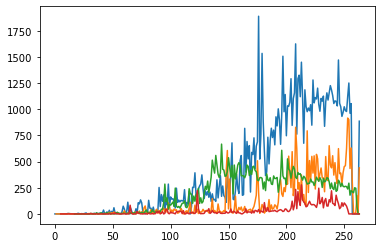

In [24]:
NRIdn=Idn['New Recovered'].values
NRJakarta=Jakarta['New Recovered'].values
NRJabar=Jabar['New Recovered'].values
NRJatim=Jatim['New Recovered'].values
NRBanten=Banten['New Recovered'].values

tIdn=range(len(NRIdn))+np.full((len(NRIdn)), len(NRJakarta)-len(NRIdn))
tJabar=range(len(NRJabar))+np.full((len(NRJabar)), len(NRJakarta)-len(NRJabar))
tJatim=range(len(NRJatim))+np.full((len(NRJatim)), len(NRJakarta)-len(NRJatim))
tBanten=range(len(NRBanten))+np.full((len(NRBanten)), len(NRJakarta)-len(NRBanten))


#plt.plot(tIdn,NRIdn,'-')
plt.plot(NRJakarta,'-')
plt.plot(tJabar,NRJabar,'-')
plt.plot(tJatim,NRJatim,'-')
plt.plot(tBanten,NRBanten,'-')

plt.show()

# Coba Regresi

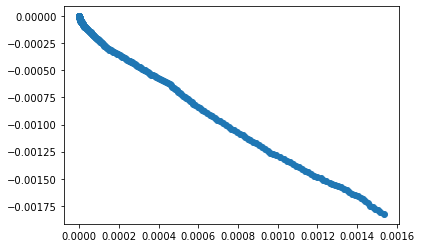

In [25]:
s=(Idn['Population'].values-Idn['Total Cases'].values-Idn['Total Deaths'].values)/((Idn['Population'].values-Idn['Total Deaths'].values))
r=Idn['Total Recovered'].values/((Idn['Population'].values-Idn['Total Deaths'].values))

plt.plot(r,np.log(s),'o')
plt.show()

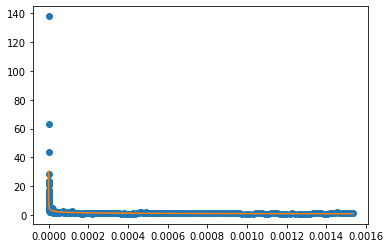

In [26]:
R=-np.gradient(np.log(s))/np.gradient(r)
logR=np.log(-np.gradient(np.log(s))/np.gradient(r))

plt.plot(r,R,'o')
plt.plot(r,np.exp(-2.2)*np.power(r,-0.3),'-')
plt.show()

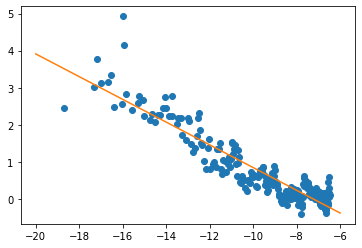

In [27]:
x=np.arange(-20,-5)
y=[]
y=-0.30643728*x-2.21822263

plt.plot(np.log(r),logR,'o')
plt.plot(x,y,'-')
plt.show()

In [28]:
s_r_fit=np.polyfit(r,np.log(s),1)
print(s_r_fit)

[-1.19124433e+00 -7.08355706e-05]


In [29]:
logR_logr_fit=np.polyfit(np.log(r),logR,1)
print(logR_logr_fit)

[-0.30643728 -2.21822263]


# Coba Masking Tanggal

In [30]:
startDate=pd.to_datetime('7/1/2020')
print(startDate)

IdnBaru = Idn[Idn['Location'] == 'Indonesia']
Idn['Date'] = pd.to_datetime(Idn['Date'])
#IdnBaru = Idn[(Idn['Date']) >= startDate]
IdnBaru.head()

2020-07-01 00:00:00


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
39,3/10/2020,IDN,Indonesia,8,0,2,6,27,0,2,...,113.921327,-0.789275,0.03,0.10,0.00,0.00,0.00%,7.41%,0.62,1.00
63,3/14/2020,IDN,Indonesia,27,1,6,20,96,5,8,...,113.921327,-0.789275,0.10,0.36,0.00,0.02,5.21%,8.33%,0.77,0.33
86,3/17/2020,IDN,Indonesia,38,0,1,37,172,5,9,...,113.921327,-0.789275,0.14,0.65,0.00,0.02,2.91%,5.23%,2.24,1.00
95,3/18/2020,IDN,Indonesia,55,14,2,39,227,19,11,...,113.921327,-0.789275,0.21,0.86,0.05,0.07,8.37%,4.85%,1.45,NaN
106,3/19/2020,IDN,Indonesia,82,6,4,72,309,25,15,...,113.921327,-0.789275,0.31,1.17,0.02,0.09,8.09%,4.85%,1.49,0.43


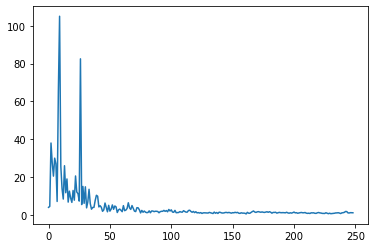

In [31]:
NCIdn=IdnBaru['New Cases'].values
NRIdn=IdnBaru['New Recovered'].values
TDIdn=IdnBaru['Total Deaths'].values
TCIdn=IdnBaru['Total Cases'].values
PopIdn=IdnBaru['Population'].values-TDIdn
RIdn=(NCIdn/NRIdn)*(PopIdn-TDIdn)/(PopIdn-TDIdn-TCIdn)
t=range(len(RIdn))

plt.plot(t,RIdn,'-')
#plt.plot(NCIdn)
plt.show()

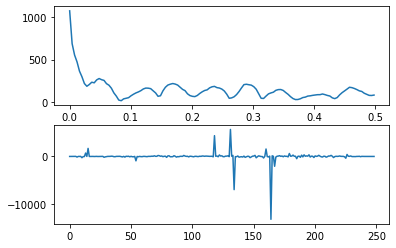

characteristic time :  18.81820539709468  hari


In [32]:
yf = sp.rfft(RIdn)
xf = sp.rfftfreq(len(RIdn), 1)

autocorrelation = np.correlate(RIdn, RIdn, mode="full")
autocorrelation = autocorrelation[autocorrelation.size//2:]
normautcor = autocorrelation/np.max(autocorrelation)
t=range(len(normautcor))

plt.subplot(211)
plt.plot(xf, np.abs(yf))
plt.subplot(212)
plt.plot(-1/(np.gradient(np.log(normautcor))/np.gradient(t)))
plt.show()
#AuCor_fit=np.polyfit(t,np.log(normautcor),1)
#print(AuCor_fit)
#print(1/AuCor_fit[1])
print('characteristic time : ',np.sum(normautcor),' hari')

1072.84828668709
12.431255129169795


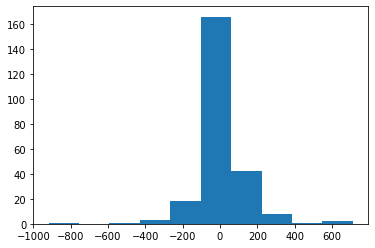

In [33]:
tc=-1/(np.gradient(np.log(normautcor))/np.gradient(t))
stdtc=np.std(tc)
medtc=np.mean(tc)
tc = tc[tc < medtc+stdtc]
tc = tc[tc > medtc-stdtc]
print(stdtc)
print(np.mean(tc))

plt.hist(tc,10)
plt.show()

In [34]:
from scipy.stats import shapiro
stat, p = shapiro(tc)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.7999353408813477, p=6.371954238230734e-17
Sample does not look Normal (reject H0)


0.03012048192771084
0.0823293172690763
0.12650602409638553
0.23493975903614456
0.2630522088353413
0.28714859437751006
0.31526104417670675
0.37148594377510036
0.431726907630522
0.4598393574297188
0.49196787148594373
[        inf         inf         inf         inf         inf         inf
         inf 33.2                inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf 12.14634146         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf  7.9047619          inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf  4.25641026         inf
         inf         inf         inf         inf       

<ipython-input-35-278db2821c67>:11: RuntimeWarning: divide by zero encountered in true_divide
  T=1/f


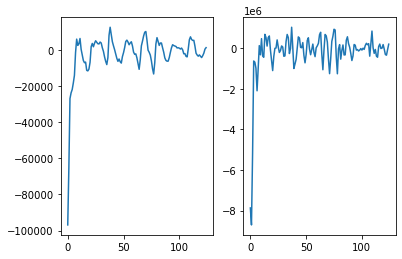

In [35]:
Dyf=np.gradient(np.abs(yf))/np.gradient(xf)
DDyf=np.gradient(np.abs(Dyf))/np.gradient(xf)

f=np.zeros(len(Dyf)-1)
for i in range(len(Dyf)-1):
    if Dyf[i+1]*Dyf[i]<0:
        if (DDyf[i]+DDyf[i+1])/2 <0:
            fi=(xf[i]+xf[i+1])/2
            print(fi)
            f[i]=fi
T=1/f
print(T)
            
plt.subplot(121)
plt.plot(Dyf)
plt.subplot(122)
plt.plot(DDyf)
plt.show()

# Data Per daerah 5 bulan terakhir

In [36]:
startDate=pd.to_datetime('7/1/2020')
print(startDate)

Jakarta['Date'] = pd.to_datetime(Jakarta['Date'])
JakartaBaru = Jakarta[(Jakarta['Date']) >= startDate]

Jabar['Date'] = pd.to_datetime(Jabar['Date'])
JabarBaru = Jabar[(Jabar['Date']) >= startDate]

Jateng['Date'] = pd.to_datetime(Jateng['Date'])
JatengBaru = Jateng[(Jateng['Date']) >= startDate]

Jatim['Date'] = pd.to_datetime(Jatim['Date'])
JatimBaru = Jatim[(Jatim['Date']) >= startDate]

Banten['Date'] = pd.to_datetime(Banten['Date'])
BantenBaru = Banten[(Banten['Date']) >= startDate]

DIY['Date'] = pd.to_datetime(DIY['Date'])
DIYBaru = DIY[(DIY['Date']) >= startDate]

2020-07-01 00:00:00


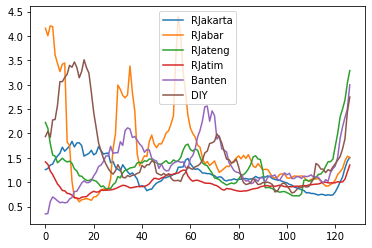

In [37]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

NCJakarta=moving_average(JakartaBaru['New Cases'].values,16)
NRJakarta=moving_average(JakartaBaru['New Recovered'].values,16)
TDJakarta=moving_average(JakartaBaru['Total Deaths'].values,16)
TCJakarta=moving_average(JakartaBaru['Total Cases'].values,16)
PopJakarta=moving_average(JakartaBaru['Population'].values,16)
RJakarta=(NCJakarta/NRJakarta)*(PopJakarta-TDJakarta)/(PopJakarta-TDJakarta-TCJakarta)

NCJabar=moving_average(JabarBaru['New Cases'].values,16)
NRJabar=moving_average(JabarBaru['New Recovered'].values,16)
TDJabar=moving_average(JabarBaru['Total Deaths'].values,16)
TCJabar=moving_average(JabarBaru['Total Cases'].values,16)
PopJabar=moving_average(JabarBaru['Population'].values,16)
RJabar=(NCJabar/NRJabar)*(PopJabar-TDJabar)/(PopJabar-TDJabar-TCJabar)

NCJateng=moving_average(JatengBaru['New Cases'].values,16)
NRJateng=moving_average(JatengBaru['New Recovered'].values,16)
TDJateng=moving_average(JatengBaru['Total Deaths'].values,16)
TCJateng=moving_average(JatengBaru['Total Cases'].values,16)
PopJateng=moving_average(JatengBaru['Population'].values,16)
RJateng=(NCJateng/NRJateng)*(PopJateng-TDJateng)/(PopJateng-TDJateng-TCJateng)

NCJatim=moving_average(JatimBaru['New Cases'].values,16)
NRJatim=moving_average(JatimBaru['New Recovered'].values,16)
TDJatim=moving_average(JatimBaru['Total Deaths'].values,16)
TCJatim=moving_average(JatimBaru['Total Cases'].values,16)
PopJatim=moving_average(JatimBaru['Population'].values,16)
RJatim=(NCJatim/NRJatim)*(PopJatim-TDJatim)/(PopJatim-TDJatim-TCJatim)

NCBanten=moving_average(BantenBaru['New Cases'].values,16)
NRBanten=moving_average(BantenBaru['New Recovered'].values,16)
TDBanten=moving_average(BantenBaru['Total Deaths'].values,16)
TCBanten=moving_average(BantenBaru['Total Cases'].values,16)
PopBanten=moving_average(BantenBaru['Population'].values,16)
RBanten=(NCBanten/NRBanten)*(PopBanten-TDBanten)/(PopBanten-TDBanten-TCBanten)

NCDIY=moving_average(DIYBaru['New Cases'].values,16)
NRDIY=moving_average(DIYBaru['New Recovered'].values,16)
TDDIY=moving_average(DIYBaru['Total Deaths'].values,16)
TCDIY=moving_average(DIYBaru['Total Cases'].values,16)
PopDIY=moving_average(DIYBaru['Population'].values,16)
RDIY=(NCDIY/NRDIY)*(PopDIY-TDDIY)/(PopDIY-TDDIY-TCDIY)

plt.plot(RJakarta,'-')
plt.plot(RJabar,'-')
plt.plot(RJateng,'-')
plt.plot(RJatim,'-')
plt.plot(RBanten,'-')
plt.plot(RDIY,'-')
plt.legend(('RJakarta','RJabar','RJateng','RJatim','Banten','DIY'),loc=0)
plt.show()

In [38]:
import csv

startDateAveraged=pd.to_datetime('7/15/2020')
JakartaBaruAveraged = JakartaBaru[(JakartaBaru['Date']) >= startDateAveraged]

with open('Reproduction_Number_jawa.csv', mode='w') as Reproduction_Number_file:
    Reproduction_Number_writer = csv.writer(Reproduction_Number_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    Reproduction_Number_writer.writerow(JakartaBaruAveraged['Date'].values)
    Reproduction_Number_writer.writerow(RJakarta)
    Reproduction_Number_writer.writerow(RJabar)
    Reproduction_Number_writer.writerow(RJateng)
    Reproduction_Number_writer.writerow(RJatim)
    Reproduction_Number_writer.writerow(RBanten)
    Reproduction_Number_writer.writerow(RDIY)
    